Sample

In [1]:
from DynGenModels.configs.registered_experiments import Config_JetClass_DeepSets_CondFlowMatch
from DynGenModels.models.experiment import Experiment

path = '../../results/qcd_to_top.ConditionalFlowMatching.DeepSets.2024.02.15_15h31'
cfm = Experiment(Config_JetClass_DeepSets_CondFlowMatch, path=path, DEVICE='cuda:2', SOLVER='dopri5', ATOL=1e-4, RTOL=1e-4)
cfm.load()

+---------------------+-------------------------------------------------+
| Parameters          | Values                                          |
+---------------------+-------------------------------------------------+
| NAME                | qcd_to_top                                      |
| DATASET             | jetclass                                        |
| DATA_SOURCE         | qcd                                             |
| DATA_TARGET         | top                                             |
| NUM_CONSTITUENTS    | 30                                              |
| FEATURES            | ['pt_rel', 'eta_rel', 'phi_rel']                |
| PREPROCESS          | ['normalize', 'logit_transform', 'standardize'] |
| DIM_INPUT           | 3                                               |
| DEVICE              | cuda:1                                          |
| OPTIMIZER           | Adam                                            |
| LR                  | 0.0001        

2024-02-15 19:38:14.374713: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 19:38:14.424664: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 19:38:14.425411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 19:38:15.178166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8/0.2/0.0
INFO: train size: 80000, validation size: 20000, testing sizes: 0


In [29]:
# get data from dataloader

len(cfm.dataloader.valid.dataset)

20000

In [3]:
from DynGenModels.datamodules.jetclass.dataprocess import PostProcessJetClassData as PostProcessor
cfm.generate_samples(cfm.dataset.source_preprocess[:10000], PostProcessor=PostProcessor)


INFO: neural ODE solver with dopri5 method and steps=100


  0%|          | 0/79 [00:00<?, ?it/s]

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def plot_jet_trajectories(trained_model, bins=[50,50,50], figsize=(15,5)):

    x0 = trained_model.pipeline.trajectories[0].reshape(-1,3).detach().cpu().numpy()
    x1 = trained_model.pipeline.trajectories[-1].reshape(-1,3).detach().cpu().numpy()
    target = trained_model.dataset.target[:x0.shape[0]].detach().cpu().numpy()
    
    _, axs = plt.subplots(1, 3, figsize=figsize)
    axs[0].hist(target[..., 0].flatten(), bins=bins[0],log=True, color='darkblue', alpha=0.25,  histtype='stepfilled', label='top', density=True)
    axs[0].hist(x0[..., 0].flatten(), bins=bins[0],log=True, color='darkred', histtype='step', label='qcd source  (t=0)', density=True)
    axs[0].hist(x1[..., 0].flatten(), bins=bins[0],log=True, color='darkblue', histtype='step', label='target (t=1)', density=True)

    axs[1].hist(target[..., 1].flatten(), bins=bins[1],log=True, color='darkblue',  alpha=0.25,  histtype='stepfilled', label='top', density=True)
    axs[1].hist(x0[..., 1].flatten(), bins=bins[1], log=True, color='darkred', histtype='step', label='qcd (source)', density=True)
    axs[1].hist(x1[..., 1].flatten(), bins=bins[0],log=True, color='darkblue', histtype='step', label='target (t=1)', density=True)

    axs[2].hist(target[..., 2].flatten(), bins=bins[2],log=True, color='darkblue',  alpha=0.25,  histtype='stepfilled', label='top', density=True)
    axs[2].hist(x0[..., 2].flatten(), bins=bins[2], log=True, color='darkred', histtype='step', label='source (t=0)', density=True)
    axs[2].hist(x1[..., 2].flatten(), bins=bins[0],log=True, color='darkblue', histtype='step', label='target (t=1)', density=True)

    axs[0].set_xlabel(r'$p_t^{rel}$ constituents')
    axs[1].set_xlabel(r'$\Delta\eta$ constituents')
    axs[2].set_xlabel(r'$\Delta\phi$ constituents')
    axs[0].set_ylabel('density')
    axs[2].legend(loc='upper right', fontsize=7)
    plt.tight_layout()
    plt.show()

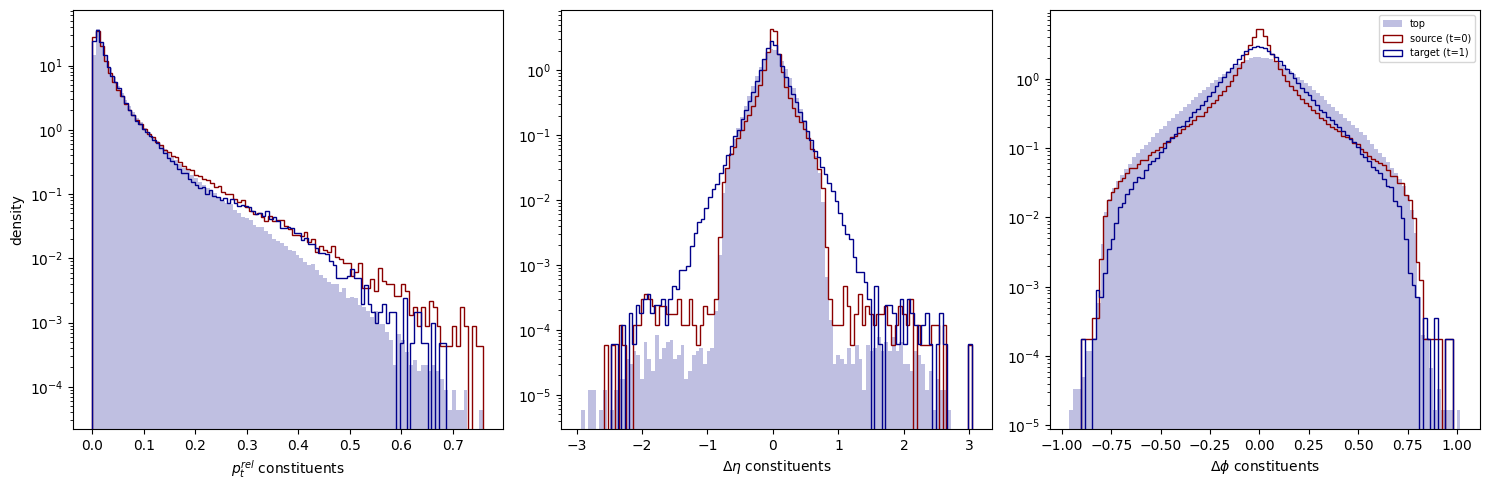

In [8]:
# from utils import plot_jet_trajectories

plot_jet_trajectories(cfm, bins=[100,100,100])
